<a href="https://colab.research.google.com/github/DrBharathiTC/Medical-insurance-premium-prediction/blob/main/MEDICAL_INSURANCE_PREMIUM_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MEDICAL INSURANCE PREMIUM PRICE PREDICTION**

## **LIBRARIES USED**

In [ ]:
# Importing Required Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

## **MOUNTING DRIVE**

In [ ]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# using pandas library and 'read_csv' function to read YesBank_StockPrices csv file
PPDF=pd.read_csv("/content/drive/My Drive/Medical Insurance Premium Prediction/Medicalpremium.csv")

## **Data Exploration**

In [ ]:
#number of rows and columns 
PPDF.shape

(986, 11)

This Dataset has 986 observations in it with 11 columns(features)

In [ ]:
PPDF.columns

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries', 'PremiumPrice'],
      dtype='object')

In [ ]:
# Here showing in Dataset the First Five rows by using head() method 
PPDF.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


In [ ]:
# Here showing in Dataset the Last Five rows by using tail() method
PPDF.tail()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
981,18,0,0,0,0,169,67,0,0,0,15000
982,64,1,1,0,0,153,70,0,0,3,28000
983,56,0,1,0,0,155,71,0,0,1,29000
984,47,1,1,0,0,158,73,1,0,1,39000
985,21,0,0,0,0,158,75,1,0,1,15000


In [ ]:
#information of the dataset 
PPDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [ ]:
#description of the data in the dataset
PPDF.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


In [ ]:
#Looking for missing values
PPDF.isnull().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

No missing values in dataset. Here our dataset in no nan values

In [ ]:
#Looking for duplicates in dataset
len(PPDF[PPDF.duplicated()])

0

Do not have any duplicates in dataset

Correct data format We are almost there! The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).

In [ ]:
PPDF.dtypes

Age                        int64
Diabetes                   int64
BloodPressureProblems      int64
AnyTransplants             int64
AnyChronicDiseases         int64
Height                     int64
Weight                     int64
KnownAllergies             int64
HistoryOfCancerInFamily    int64
NumberOfMajorSurgeries     int64
PremiumPrice               int64
dtype: object

## **Checking the Outlier**

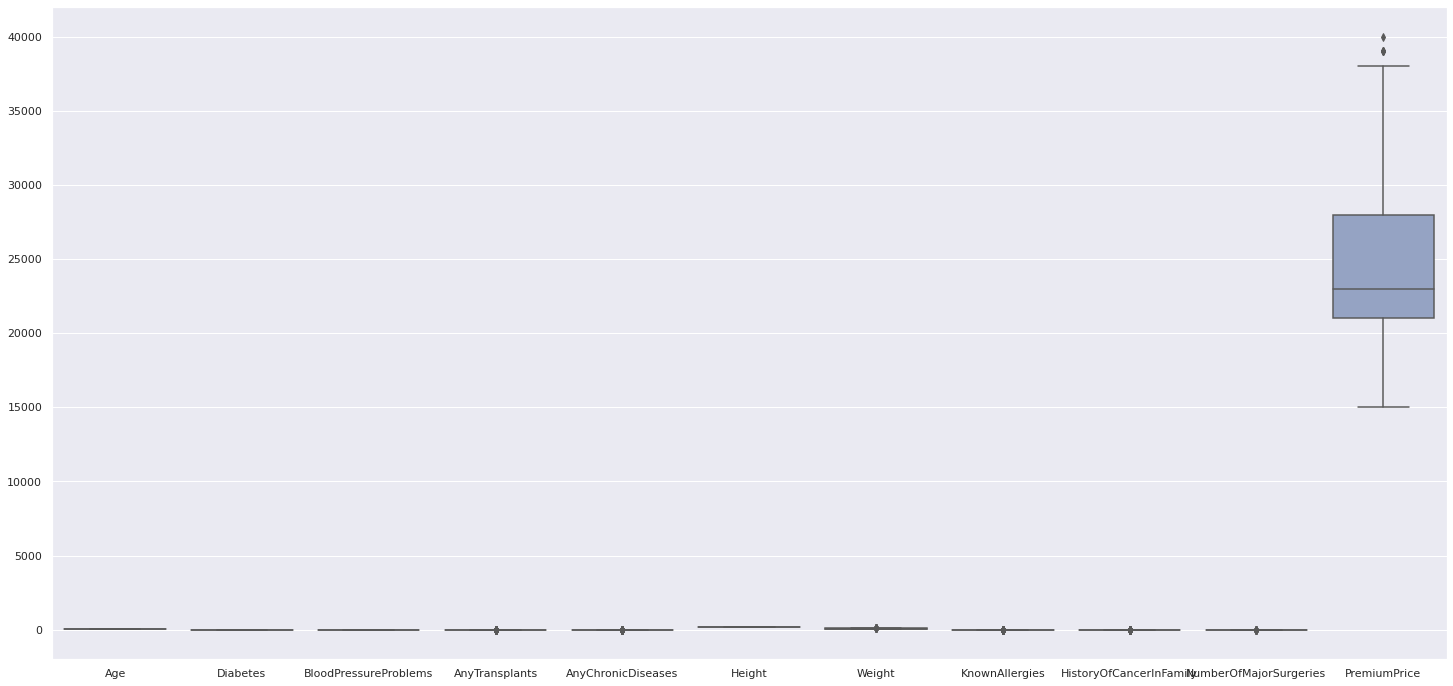

In [ ]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(25,12)})
ax = sns.boxplot(data=PPDF, orient="v", palette="Set2")

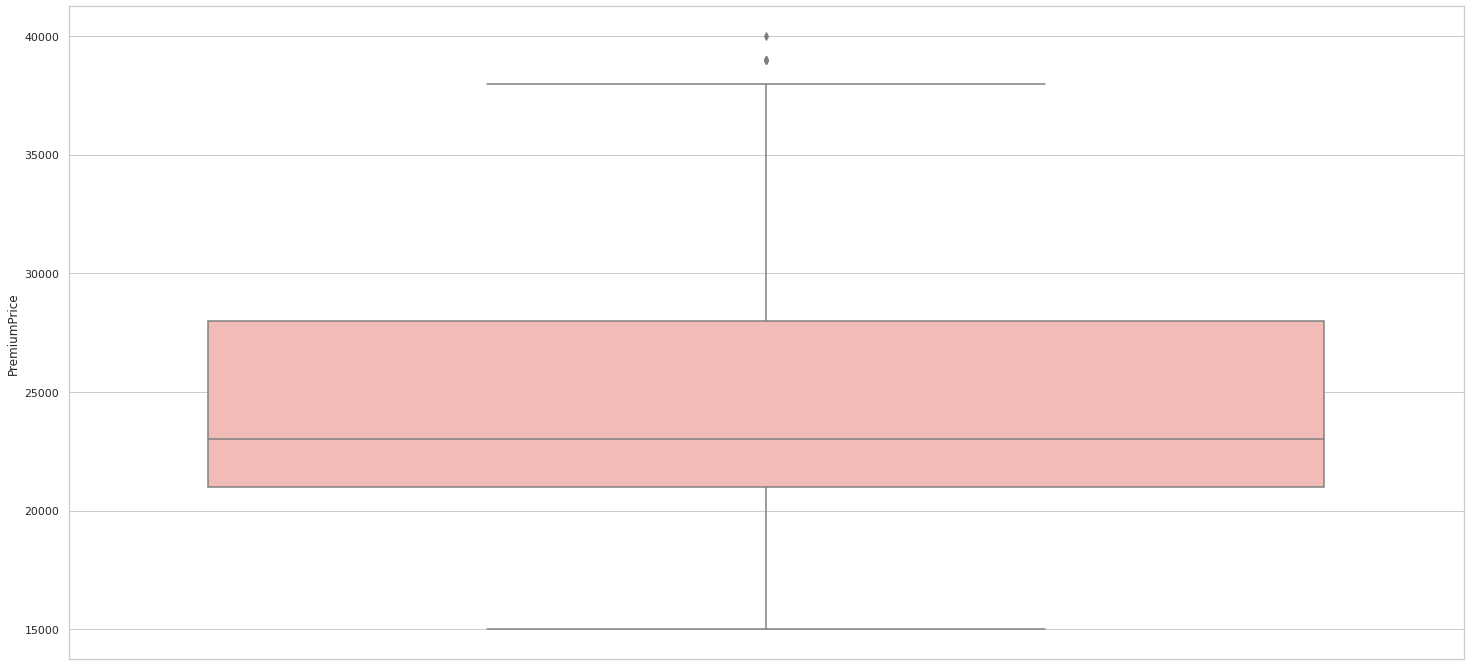

In [ ]:
sns.set_style('whitegrid')
sns.boxplot(y=PPDF[('PremiumPrice')], palette='Pastel1');
plt.show()

### **Removing outliers**

In [ ]:
percentile_25 = np.percentile(PPDF['PremiumPrice'],25)
percentile_75 = np.percentile(PPDF['PremiumPrice'],75)
iqr = (percentile_75 - percentile_25)
upper_outlier_bound = percentile_75 + 1.5*iqr
lower_outlier_bound = percentile_25 - 1.5*iqr
PPDF.drop(index=PPDF[PPDF['PremiumPrice']>upper_outlier_bound].index,axis=0,inplace=True)
PPDF.drop(index=PPDF[PPDF['PremiumPrice']<lower_outlier_bound].index,axis=0,inplace=True)

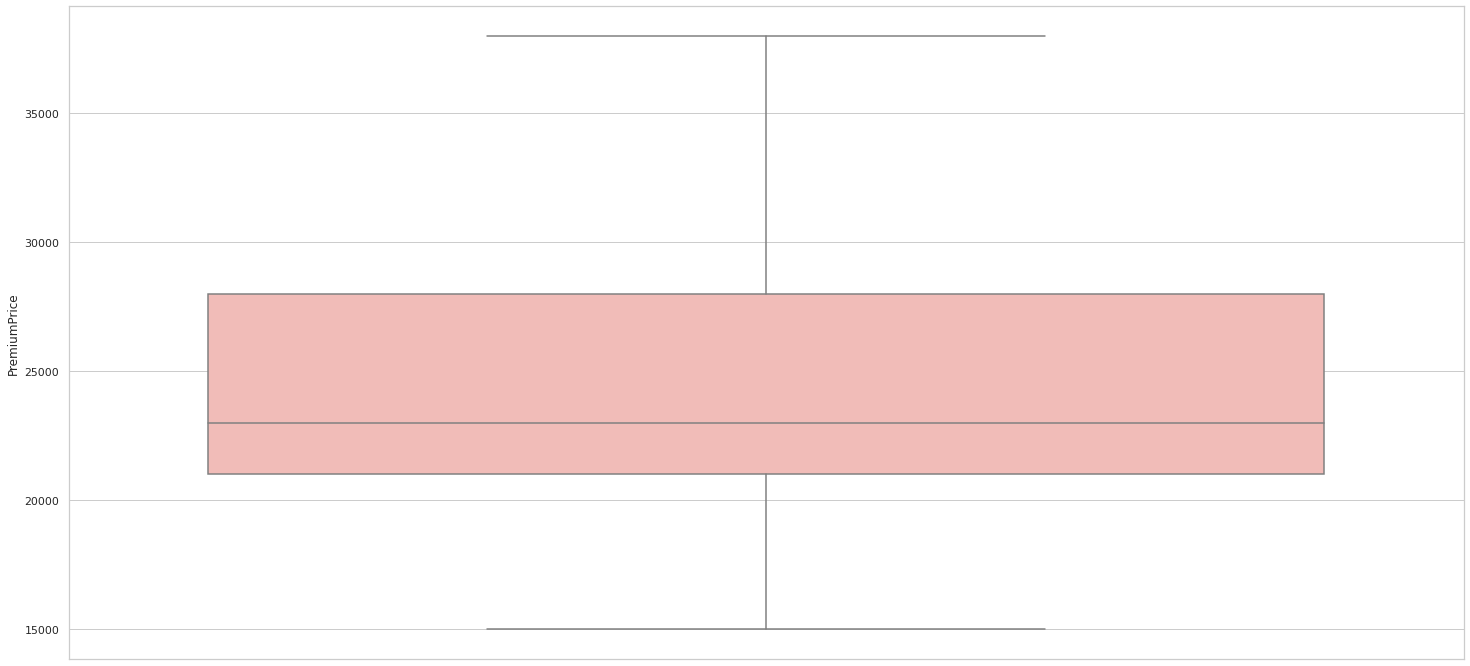

In [ ]:
sns.set_style('whitegrid')
sns.boxplot(y=PPDF[('PremiumPrice')], palette='Pastel1');
plt.show()

Data Wrangling is finished. Dataset is clean and ready for exploratory data analysis

(Data wrangling is the process of converting data from the initial format to a format that may be better for analysis.

Objectives: Handle missing values Correct data format Standardize and normalize data)

In [ ]:
PPDF.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000


# **Visualising the data**

## **Univariate analysis**

Dependent variable - premium price of insurance

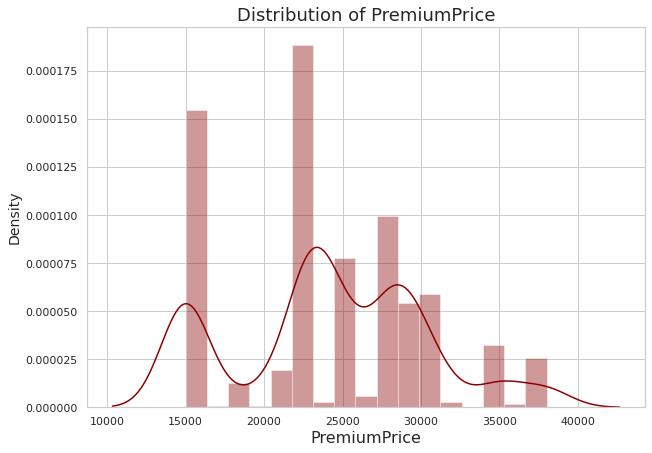

In [ ]:
# depndent variable is 'PremiumPrice'
plt.figure(figsize = (10,7))
sns.distplot(PPDF['PremiumPrice'], color = 'darkred',kde=True)
plt.title('Distribution of PremiumPrice', fontsize=18)
plt.xlabel('PremiumPrice', fontsize= 16)
plt.ylabel('Density', fontsize=14)
plt.show()

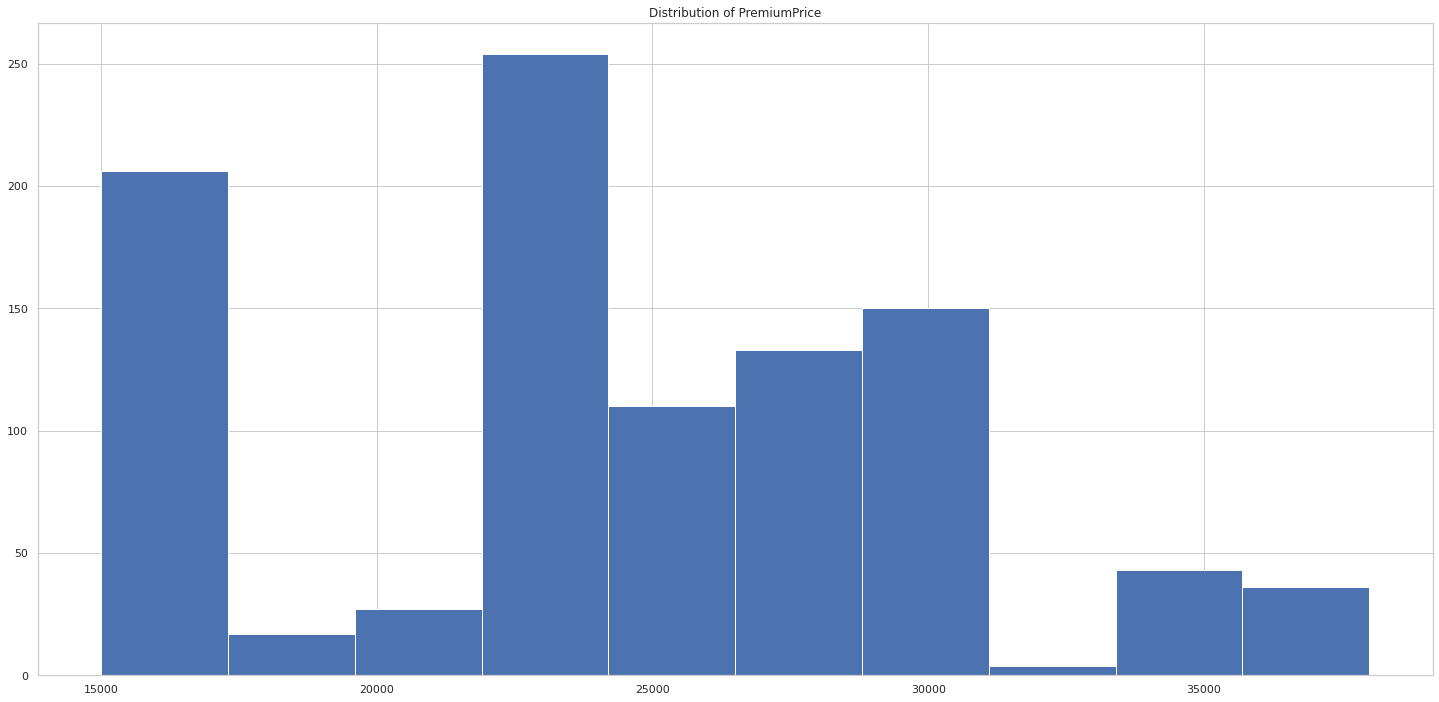

In [ ]:
PPDF.PremiumPrice.hist()
plt.title('Distribution of PremiumPrice');

### **Checking the distribution of variables using KDE plot**

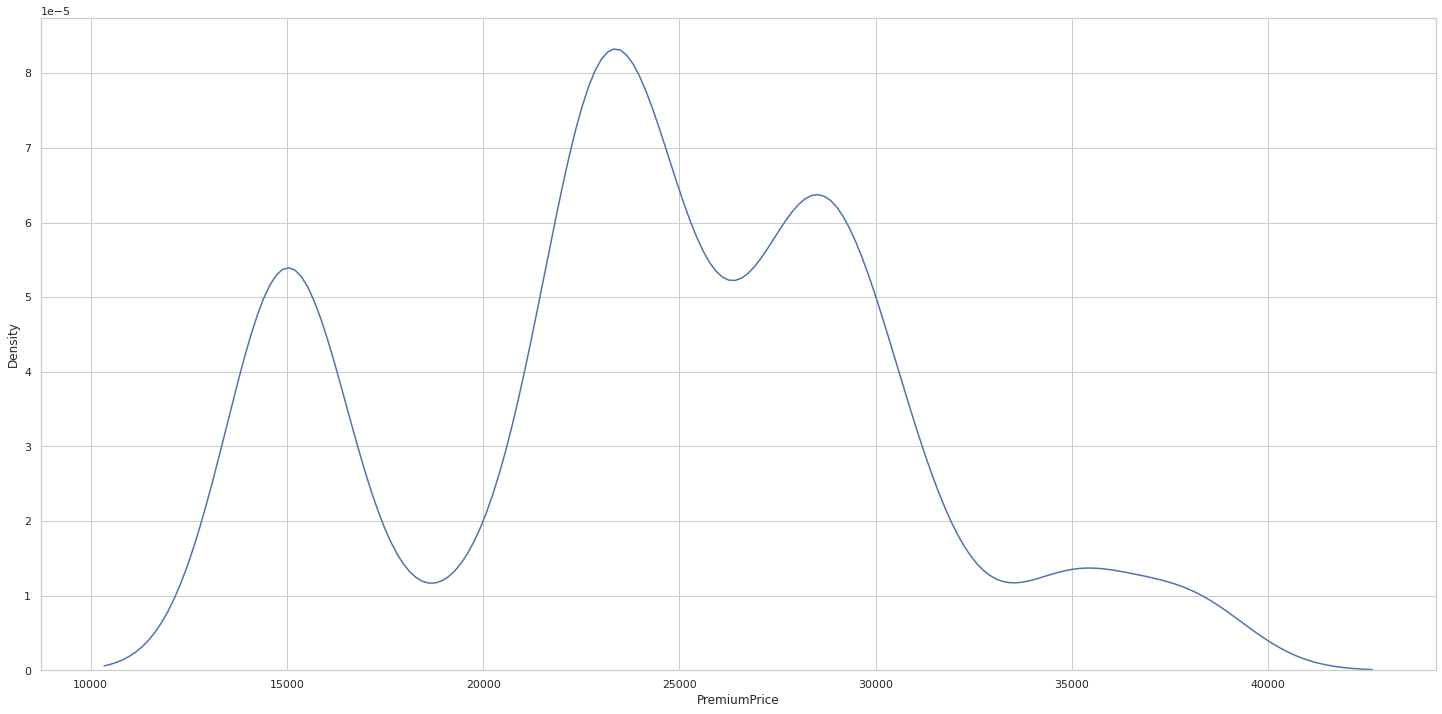

In [ ]:
sns.kdeplot(PPDF.PremiumPrice);

### **Checking the distribution of variables using a Q-Q plot**

In [ ]:
#importing necessary libraries
import scipy.stats as stats
import pylab

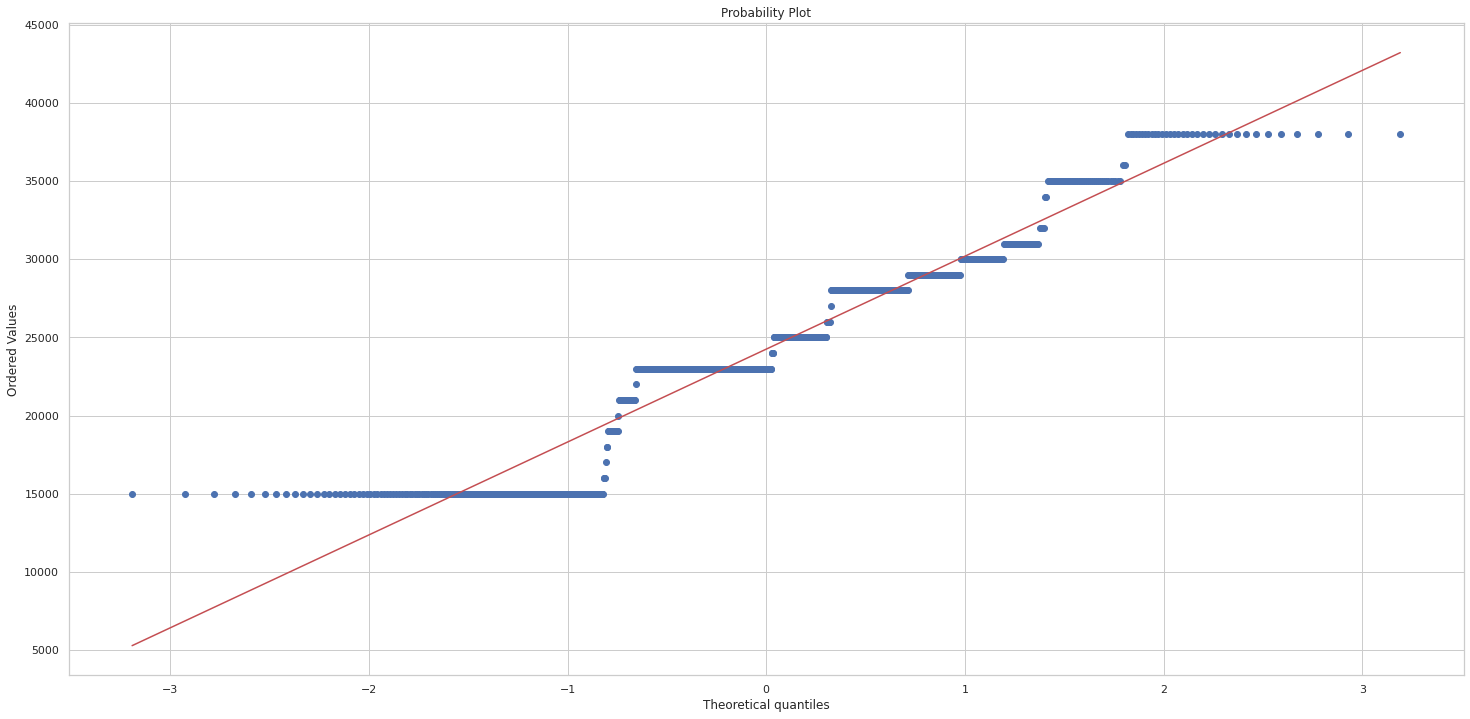

In [ ]:
stats.probplot(PPDF.PremiumPrice,plot=pylab);

## **Independent Variables Age , Height and Weight**
Plotting distribution of Age , Height and Weight

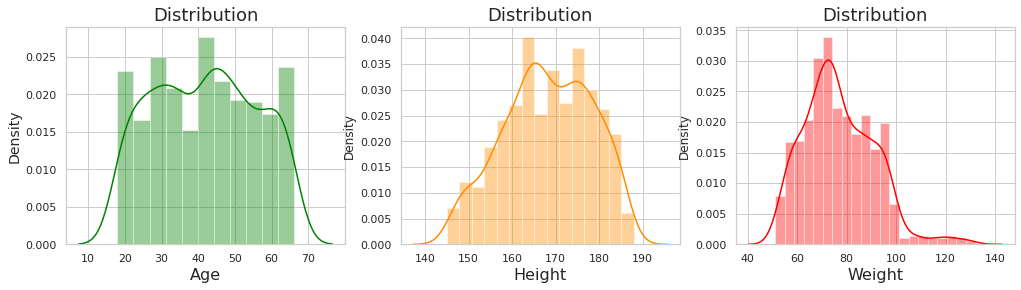

In [ ]:
plt.figure(figsize = (17,4))

plt.subplot(1, 3, 1)
sns.distplot(PPDF['Age'], color = 'Green')
plt.title('Distribution', fontsize=18)
plt.xlabel('Age', fontsize= 16)
plt.ylabel('Density', fontsize=14)

plt.subplot(1, 3, 2)
sns.distplot(PPDF['Height'], color = 'Darkorange')
plt.title('Distribution', fontsize=18)
plt.xlabel('Height', fontsize= 16)

plt.subplot(1, 3, 3)
sns.distplot(PPDF['Weight'], color = 'Red')
plt.title('Distribution', fontsize=18)
plt.xlabel('Weight', fontsize= 16)

plt.show()


### **Categorical data visualisation**

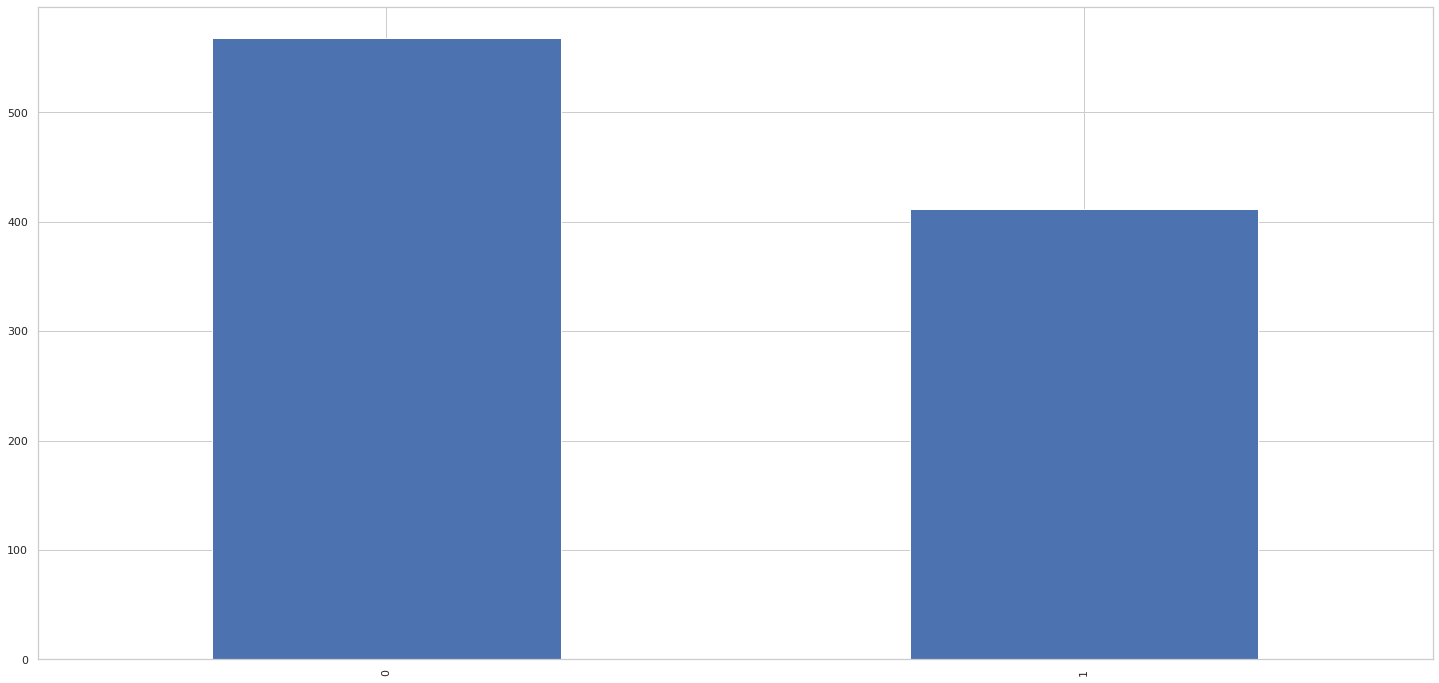

In [ ]:
PPDF['Diabetes'].value_counts().plot(kind='bar')

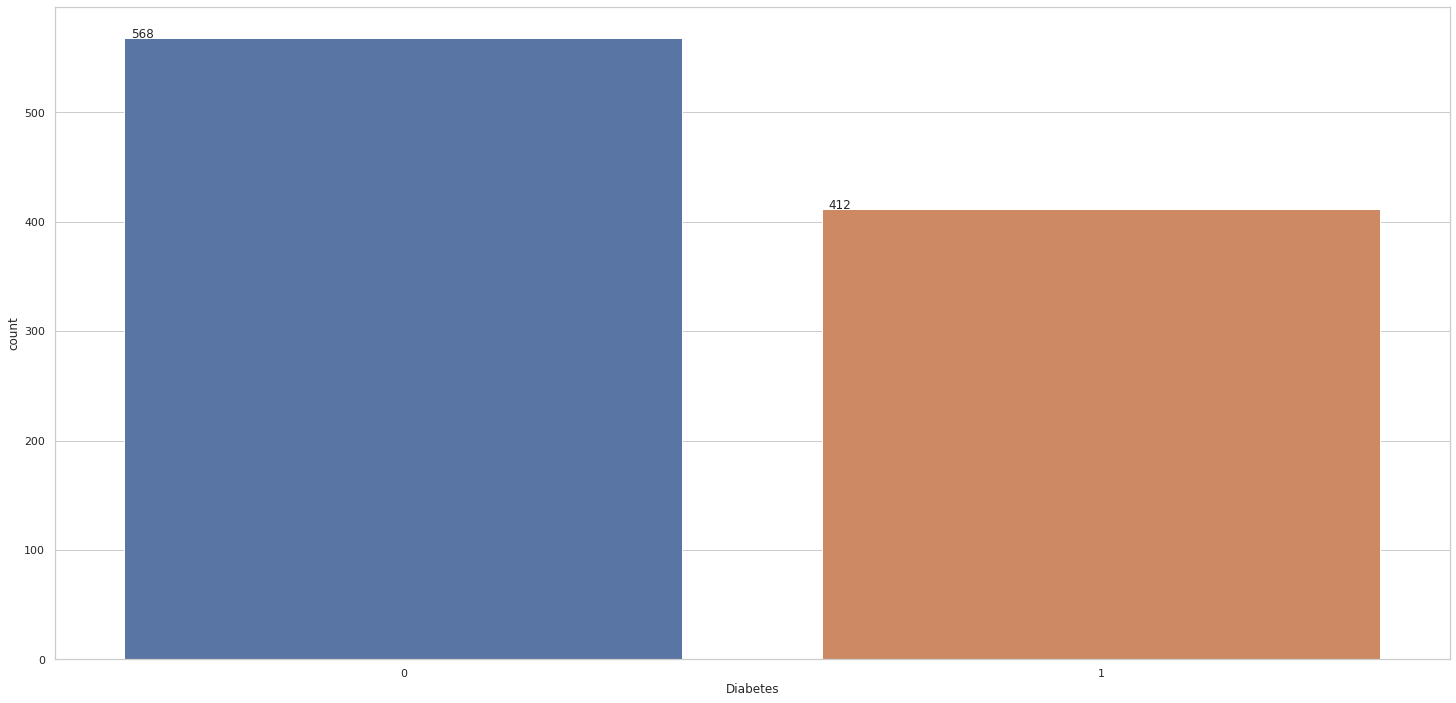

In [ ]:
ax = sns.countplot(x="Diabetes", data=PPDF)


for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+0.01))


ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.show()


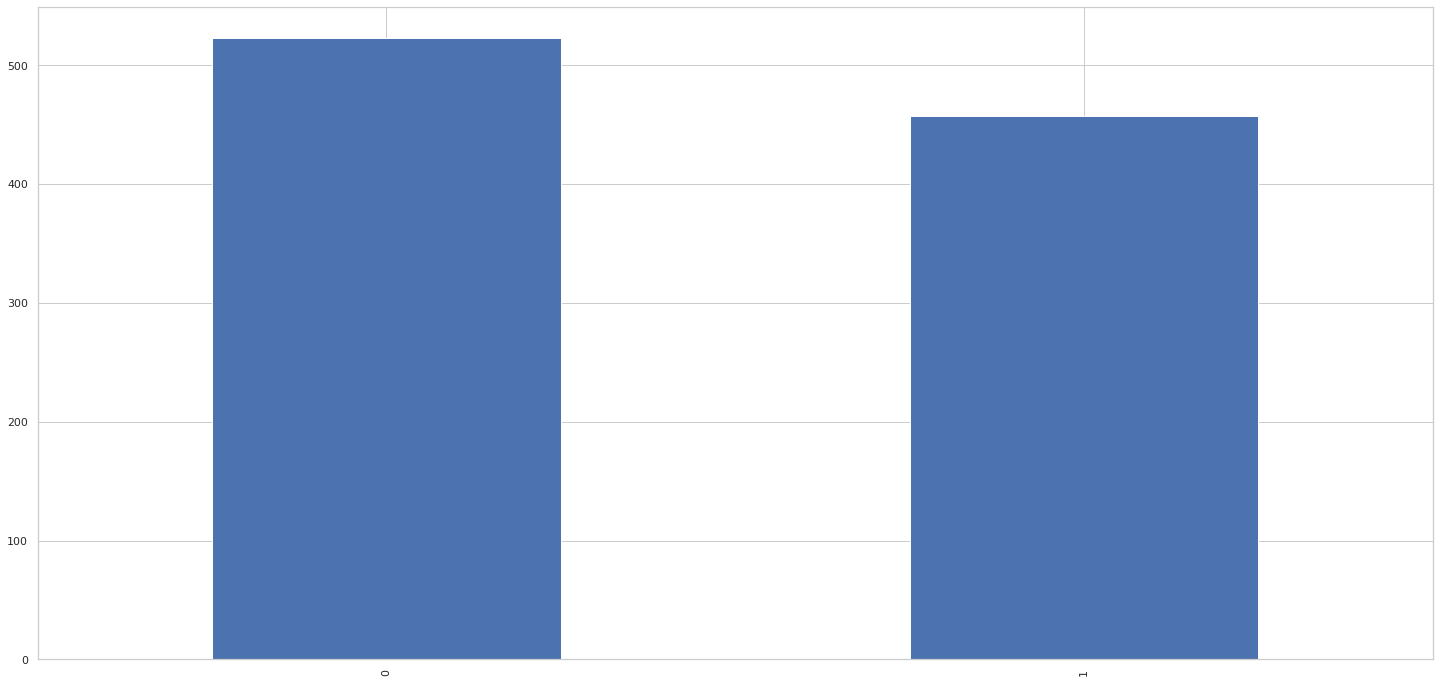

In [ ]:
PPDF['BloodPressureProblems'].value_counts().plot(kind='bar')

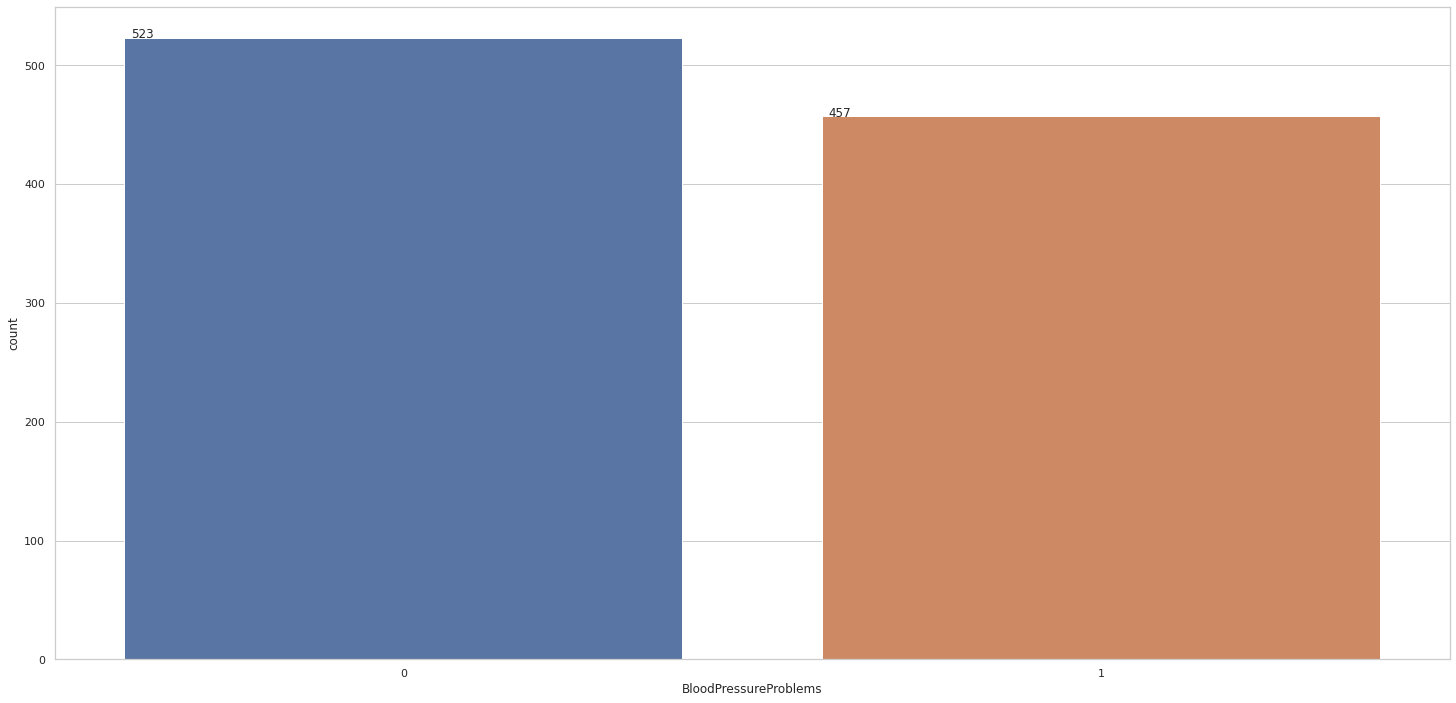

In [ ]:
ax = sns.countplot(x="BloodPressureProblems", data=PPDF)


for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+0.01))


ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.show()


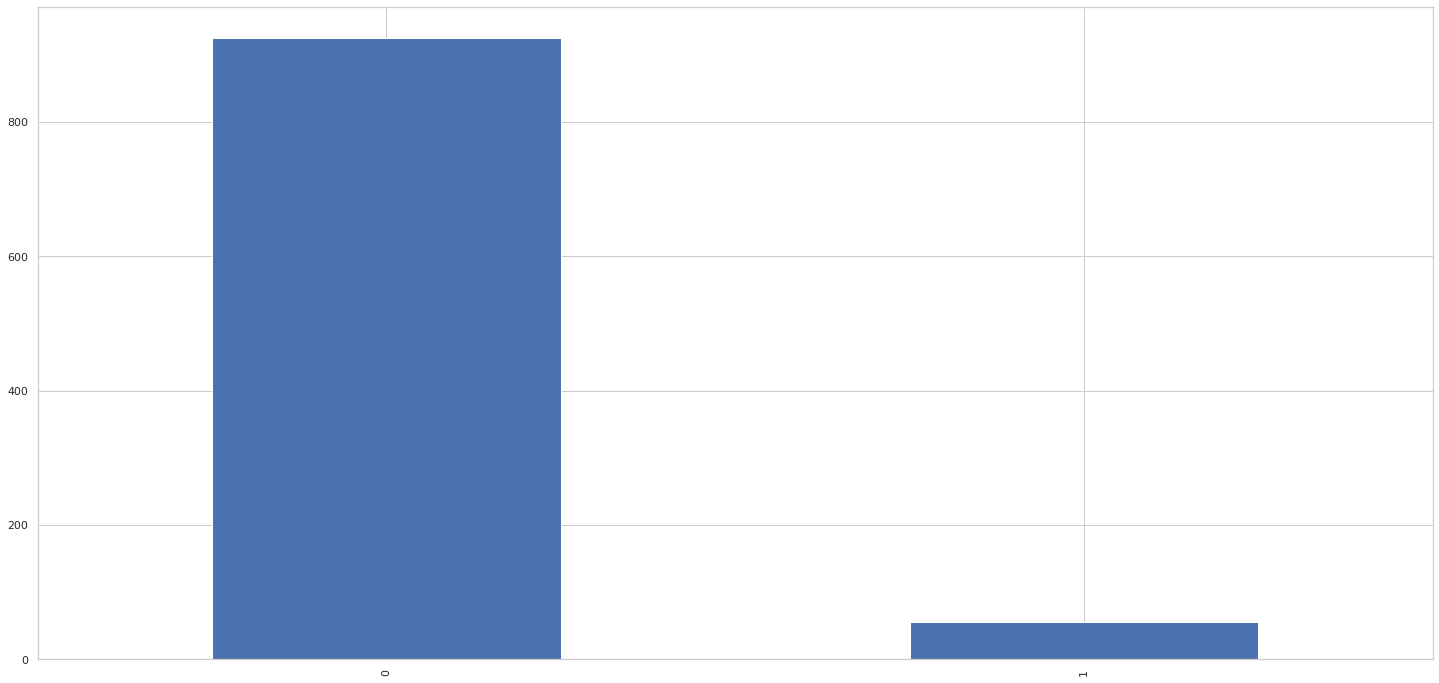

In [ ]:
PPDF['AnyTransplants'].value_counts().plot(kind='bar')

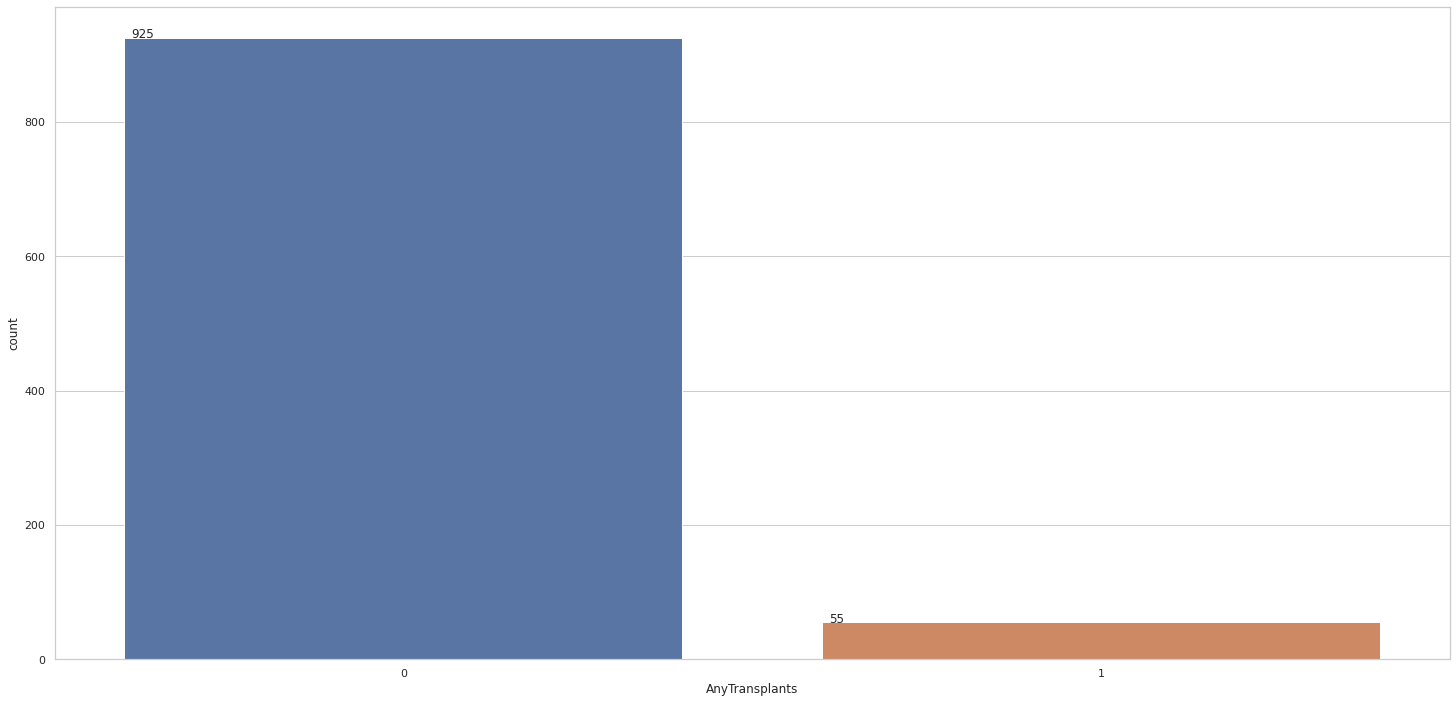

In [ ]:
ax = sns.countplot(x="AnyTransplants", data=PPDF)


for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+0.01))


ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.show()


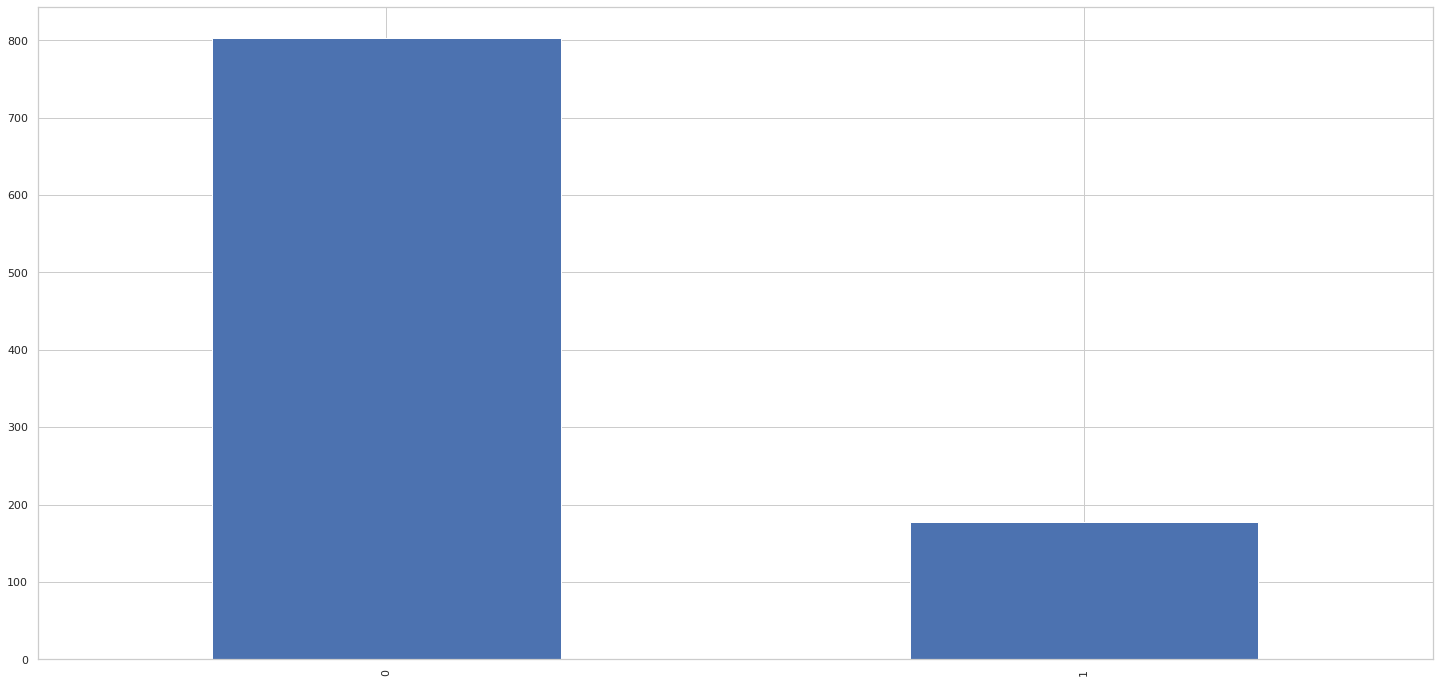

In [ ]:
PPDF['AnyChronicDiseases'].value_counts().plot(kind='bar')

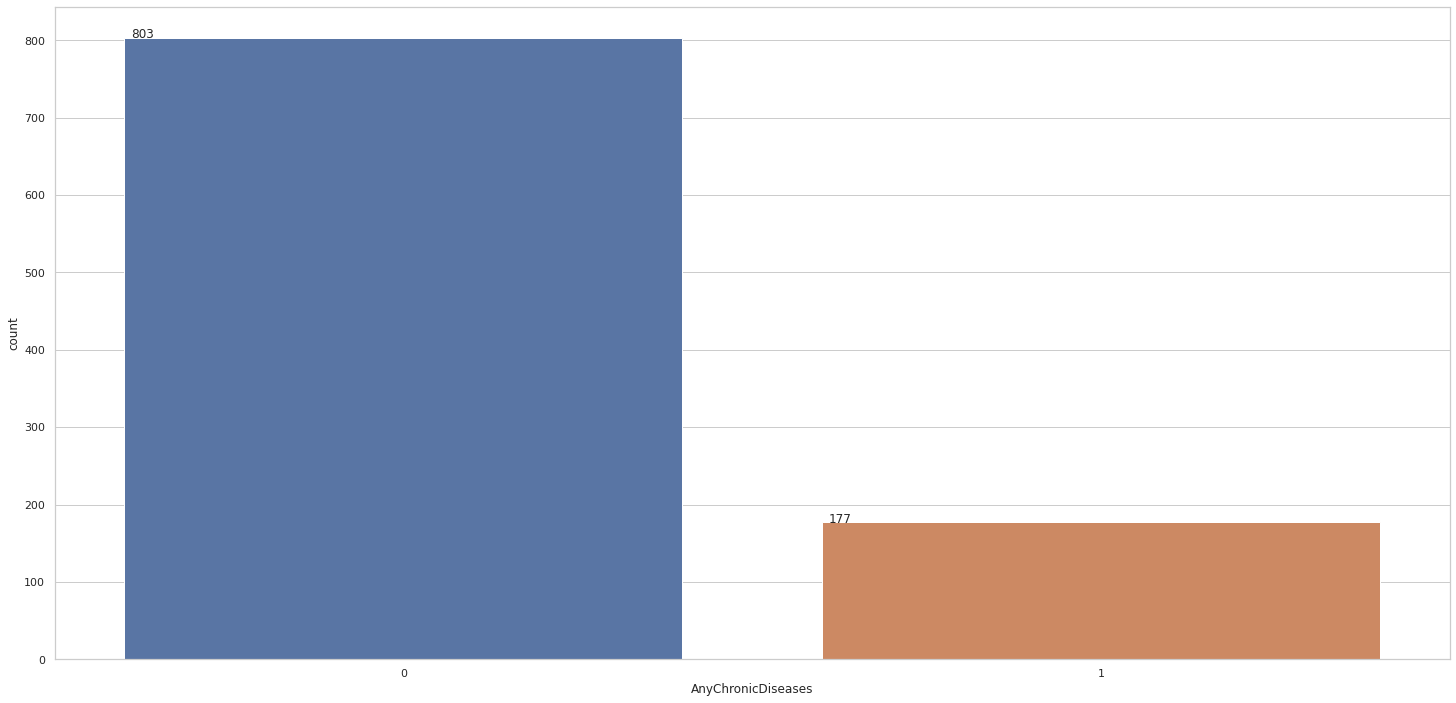

In [ ]:
ax = sns.countplot(x="AnyChronicDiseases", data=PPDF)


for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+0.01))


ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.show()

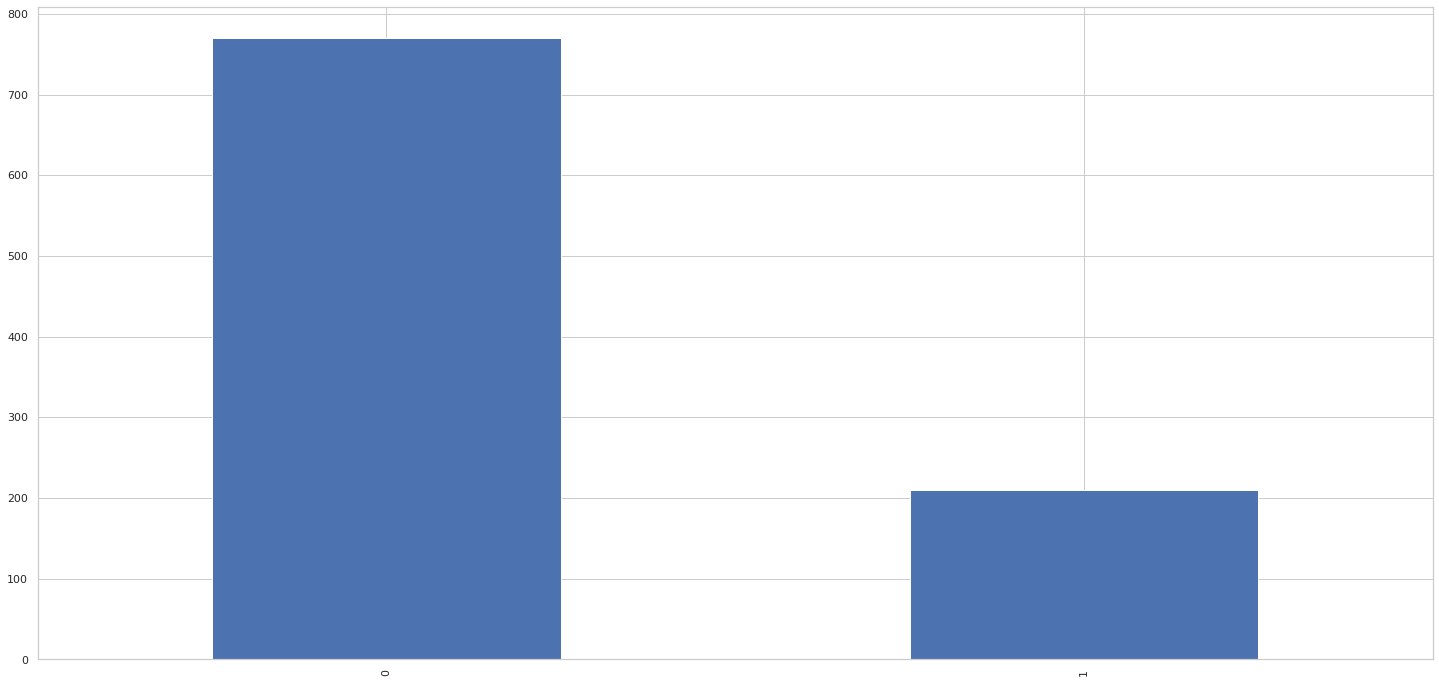

In [ ]:
PPDF['KnownAllergies'].value_counts().plot(kind='bar')

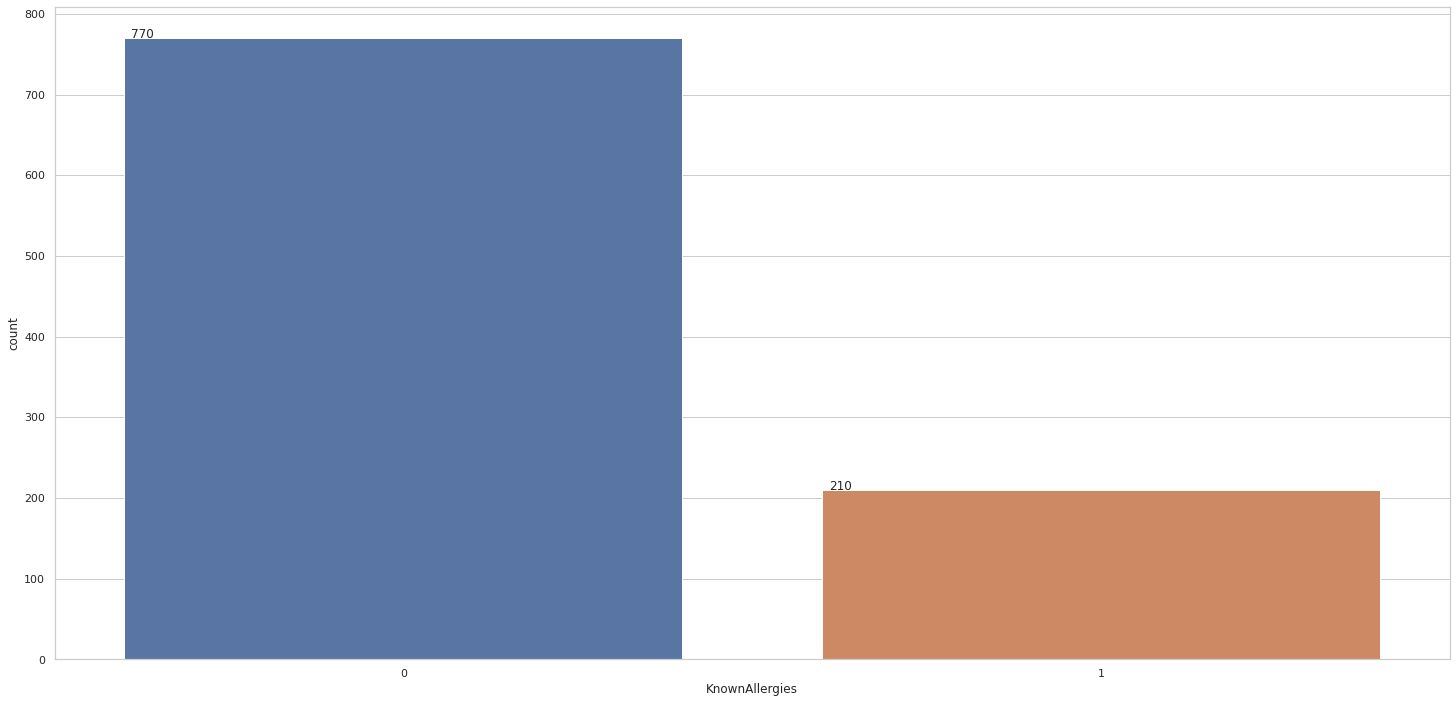

In [ ]:
ax = sns.countplot(x="KnownAllergies", data=PPDF)


for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+0.01))


ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.show()

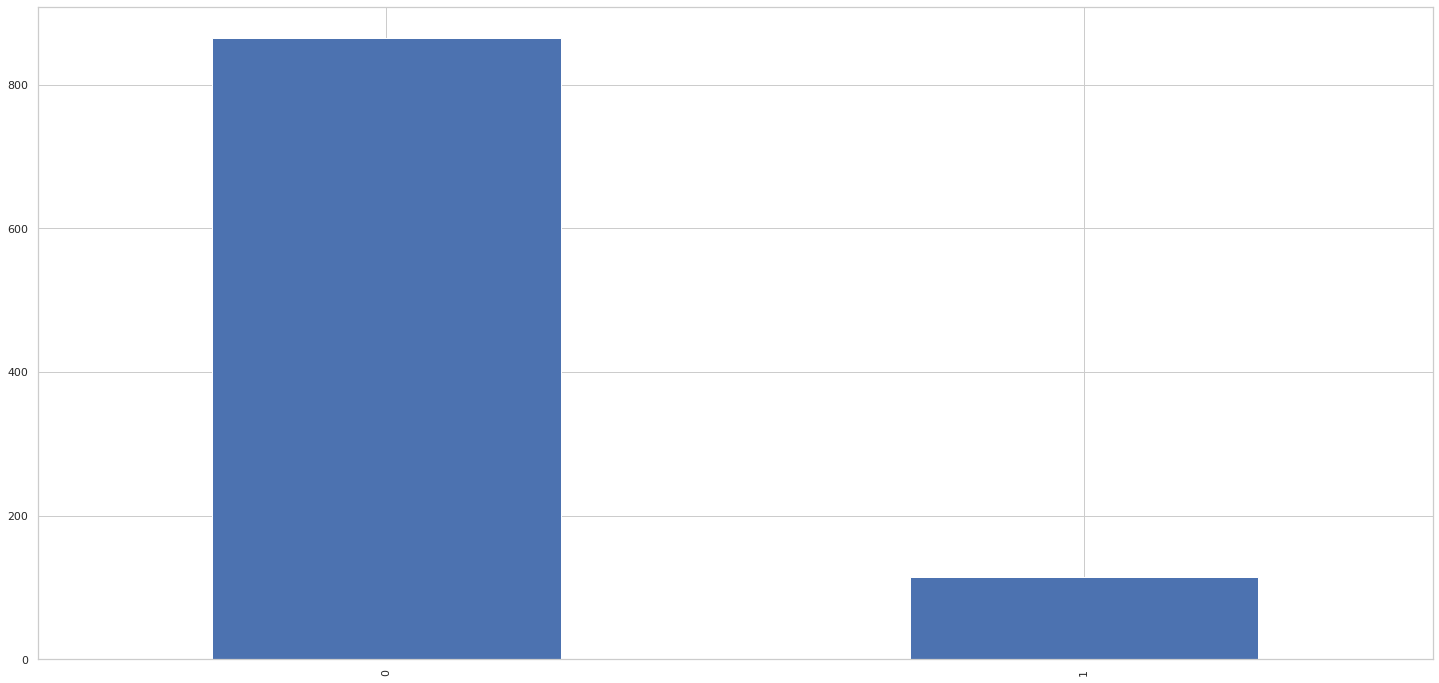

In [ ]:
PPDF['HistoryOfCancerInFamily'].value_counts().plot(kind='bar')

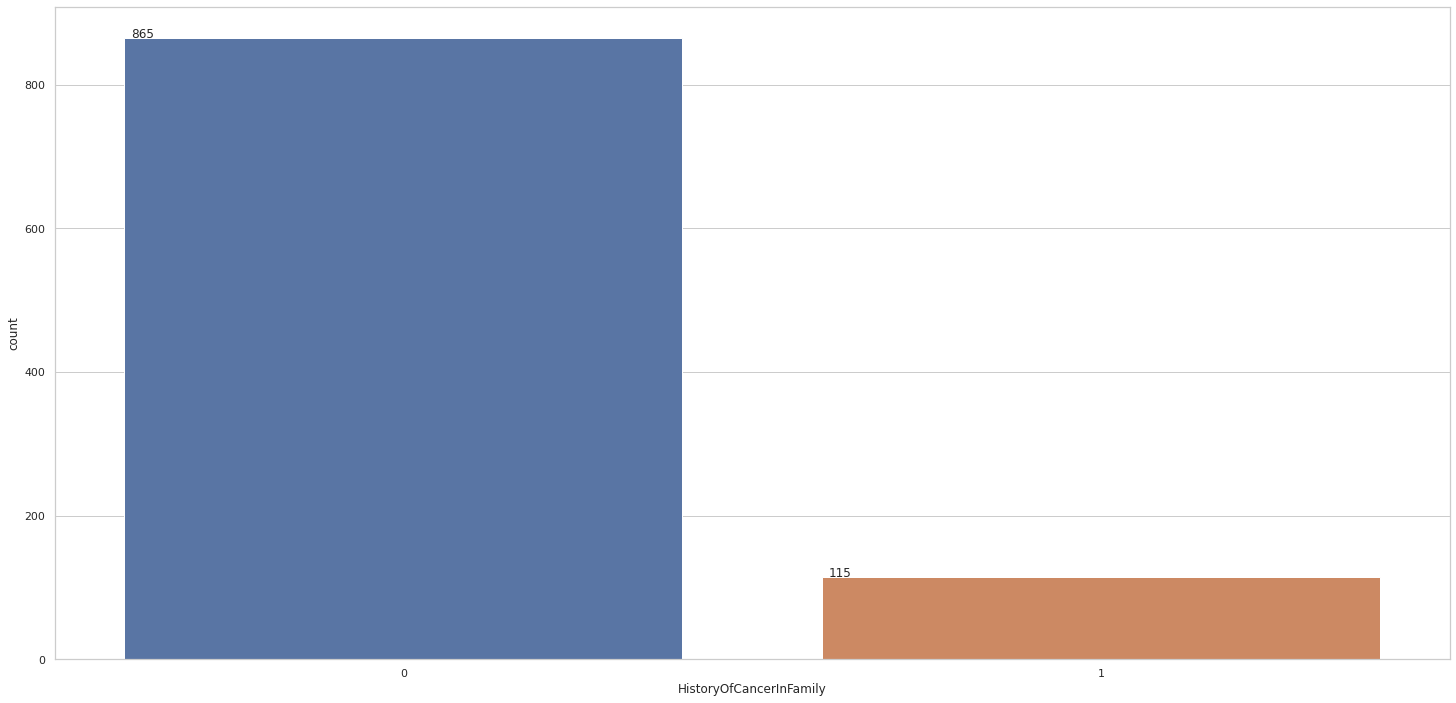

In [ ]:
ax = sns.countplot(x="HistoryOfCancerInFamily", data=PPDF)


for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+0.01))


ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.show()

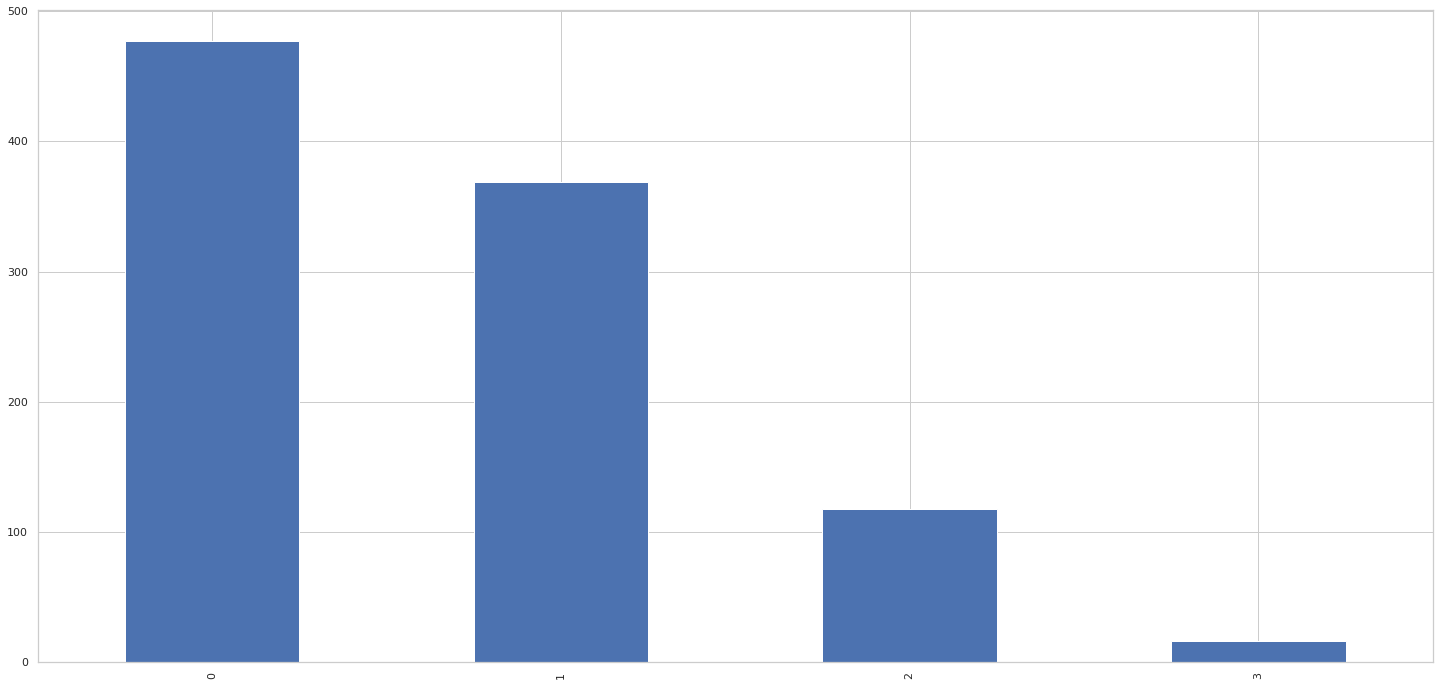

In [ ]:
PPDF['NumberOfMajorSurgeries'].value_counts().plot(kind='bar')

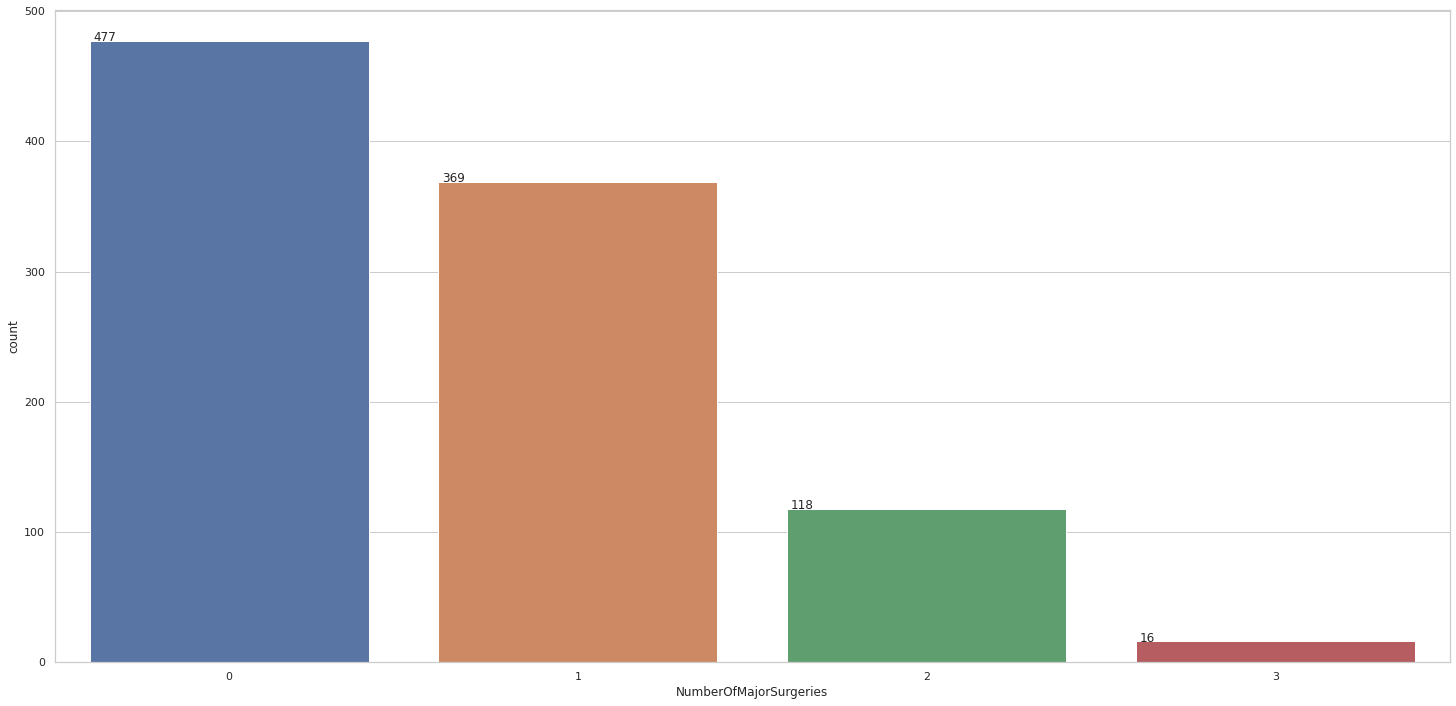

In [ ]:
ax = sns.countplot(x="NumberOfMajorSurgeries", data=PPDF)


for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.01, p.get_height()+0.01))


ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
plt.show()

## **Multivariate analysis**

PremiumPrice vs Other Variables

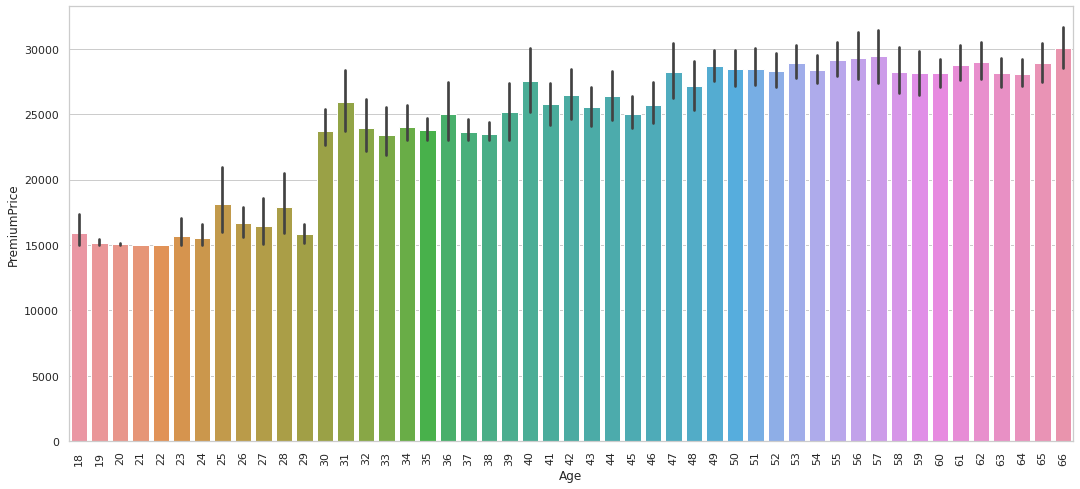

In [ ]:
# PremiumPrice vs Age
plt.figure(figsize = (18,8))
plt.xticks(rotation=90)
sns.barplot(x="Age", y="PremiumPrice", data=PPDF)
plt.show()

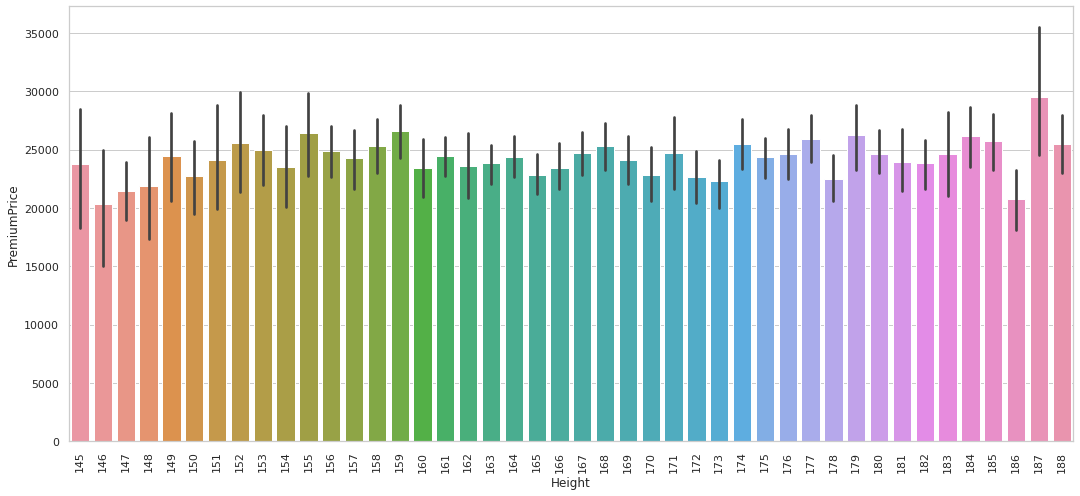

In [ ]:
# PremiumPrice vs Height
plt.figure(figsize = (18,8))
plt.xticks(rotation=90)
sns.barplot(x="Height", y="PremiumPrice", data=PPDF)
plt.show()

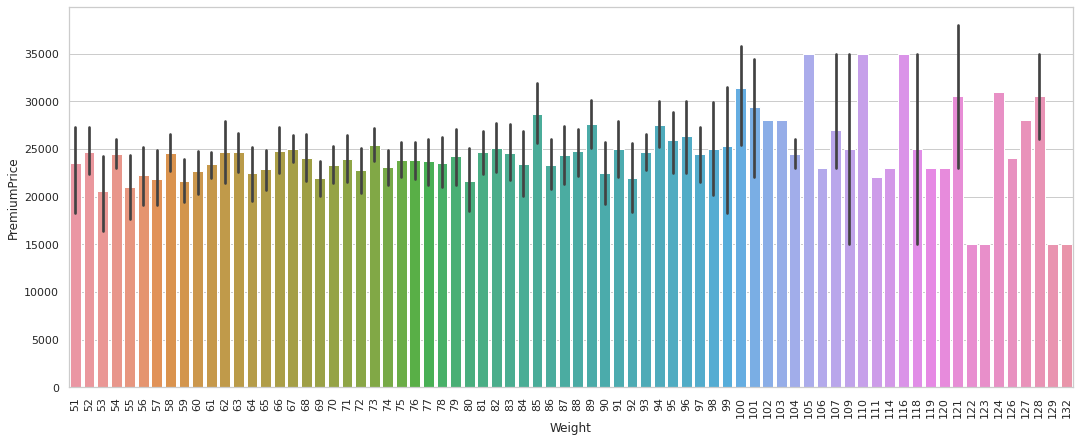

In [ ]:
# PremiumPrice vs Weight
plt.figure(figsize = (18,7))
plt.xticks(rotation=90)
sns.barplot(x="Weight", y="PremiumPrice", data=PPDF)
plt.show()

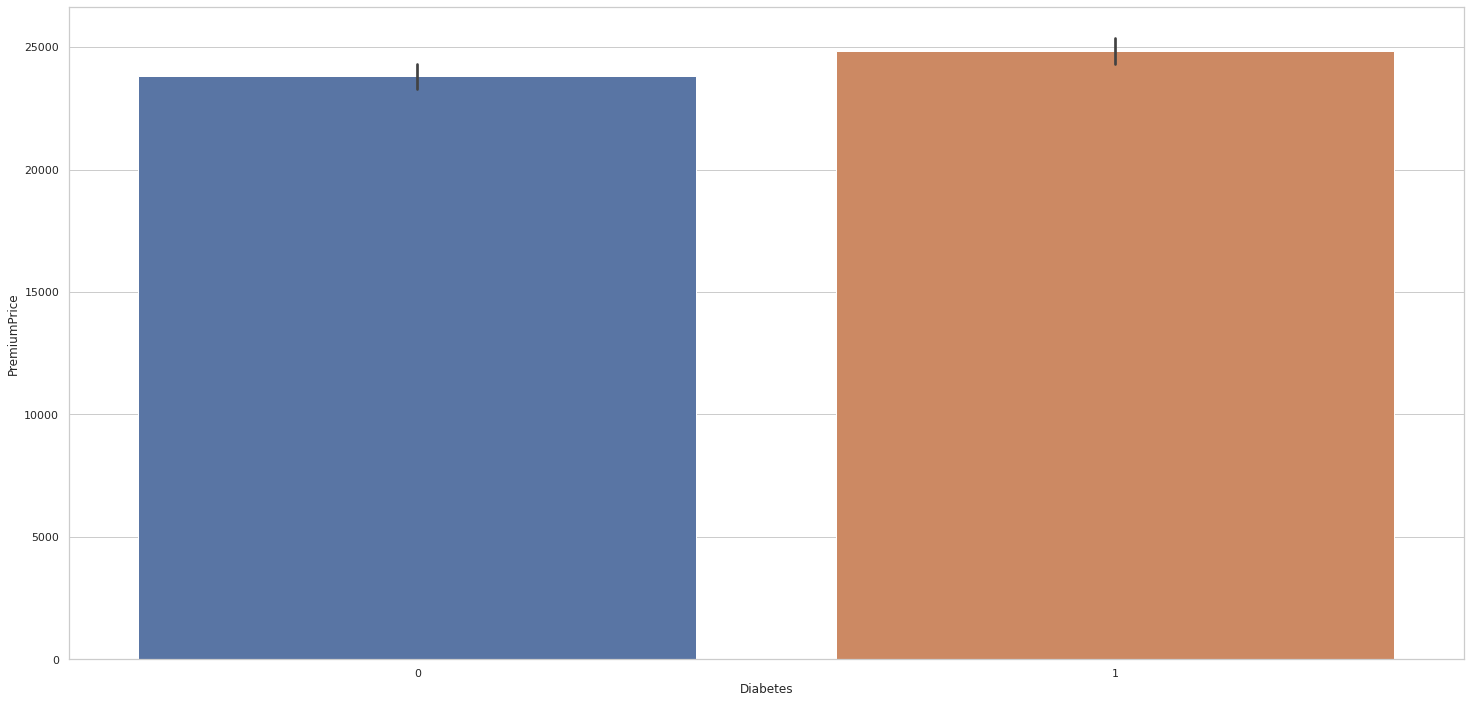

In [ ]:
sns.barplot(x="Diabetes", y="PremiumPrice", data=PPDF)
plt.show()

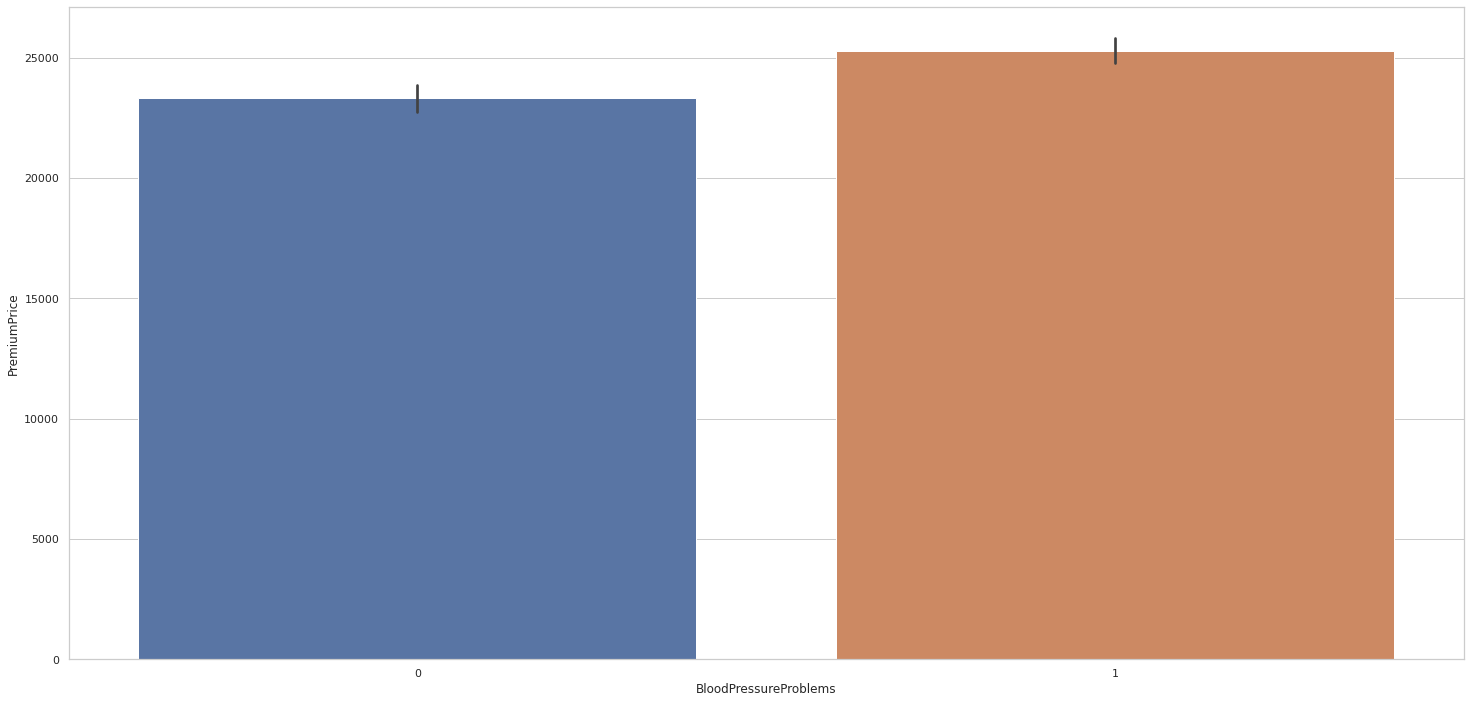

In [ ]:
sns.barplot(x="BloodPressureProblems", y="PremiumPrice", data=PPDF)
plt.show()

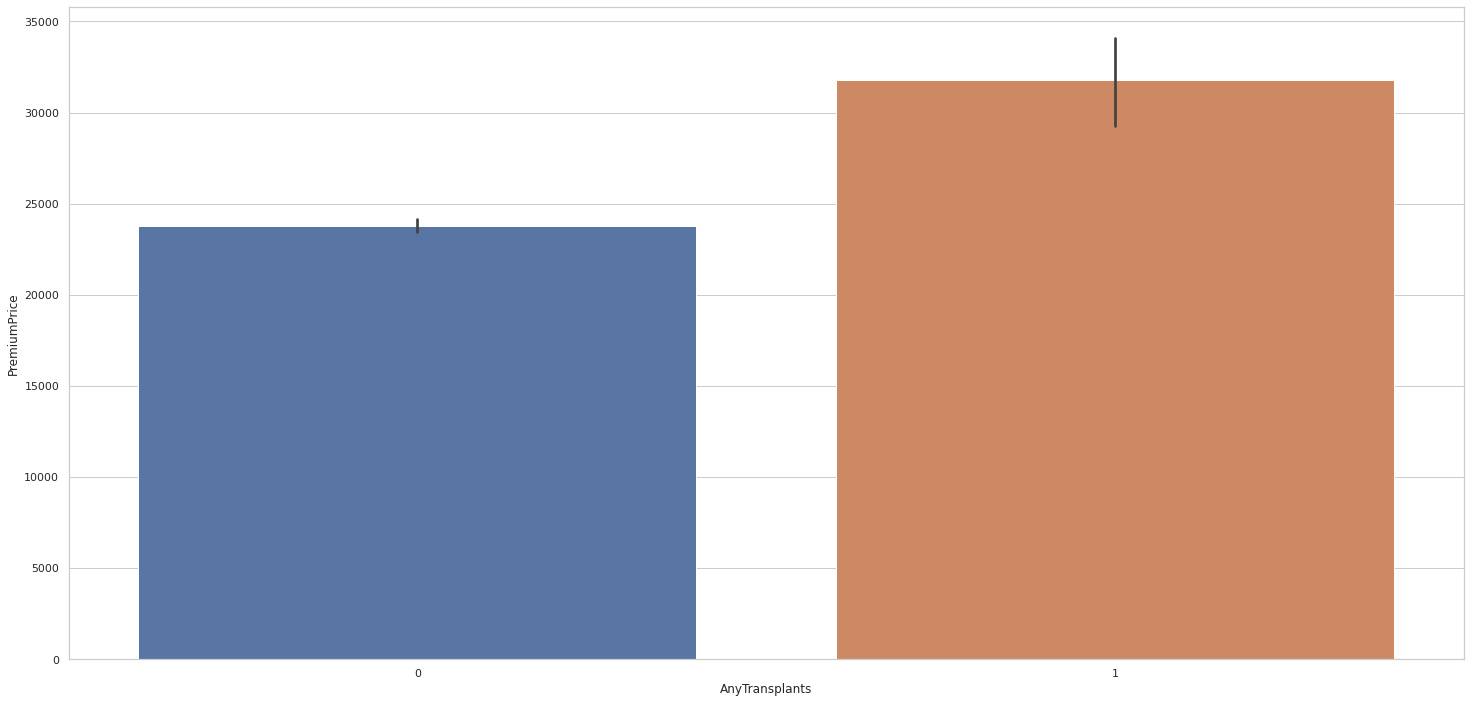

In [ ]:
sns.barplot(x="AnyTransplants", y="PremiumPrice", data=PPDF)
plt.show()

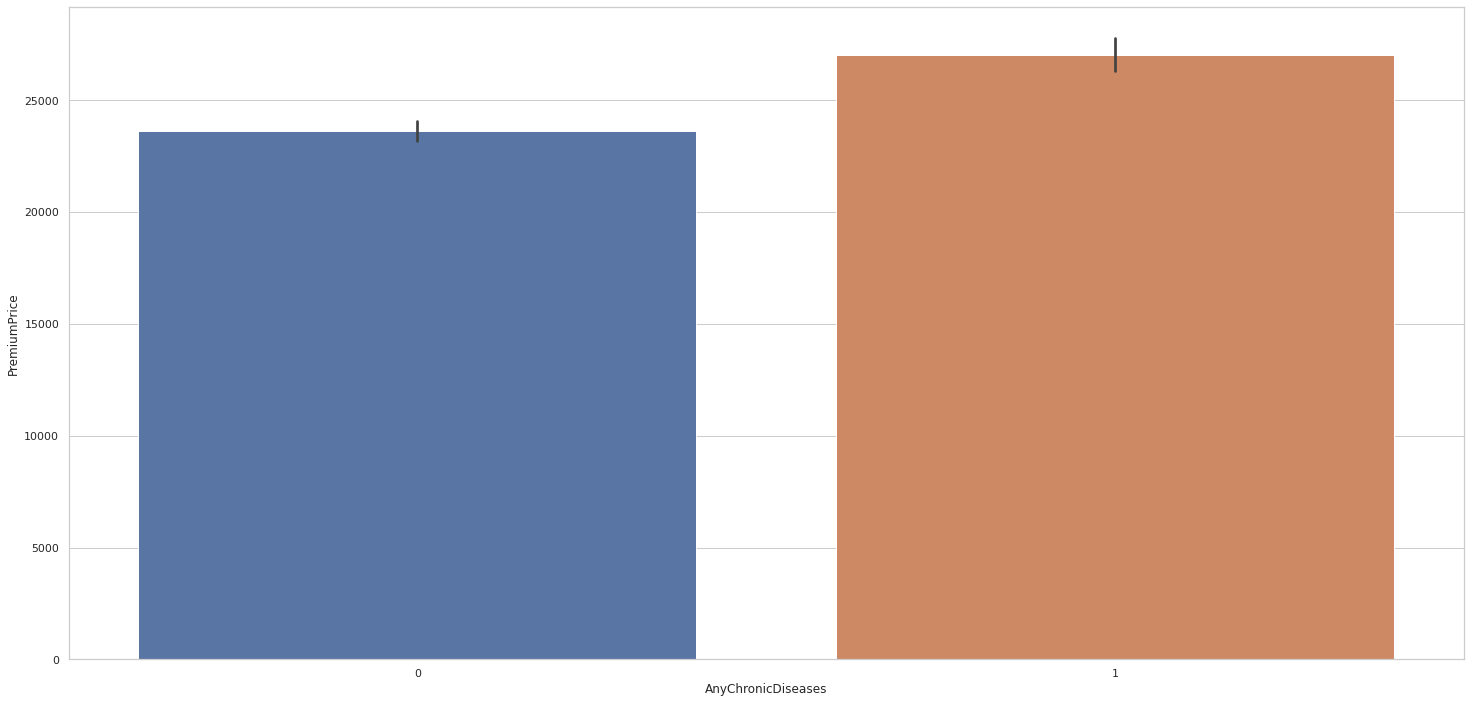

In [ ]:
sns.barplot(x="AnyChronicDiseases", y="PremiumPrice", data=PPDF)
plt.show()

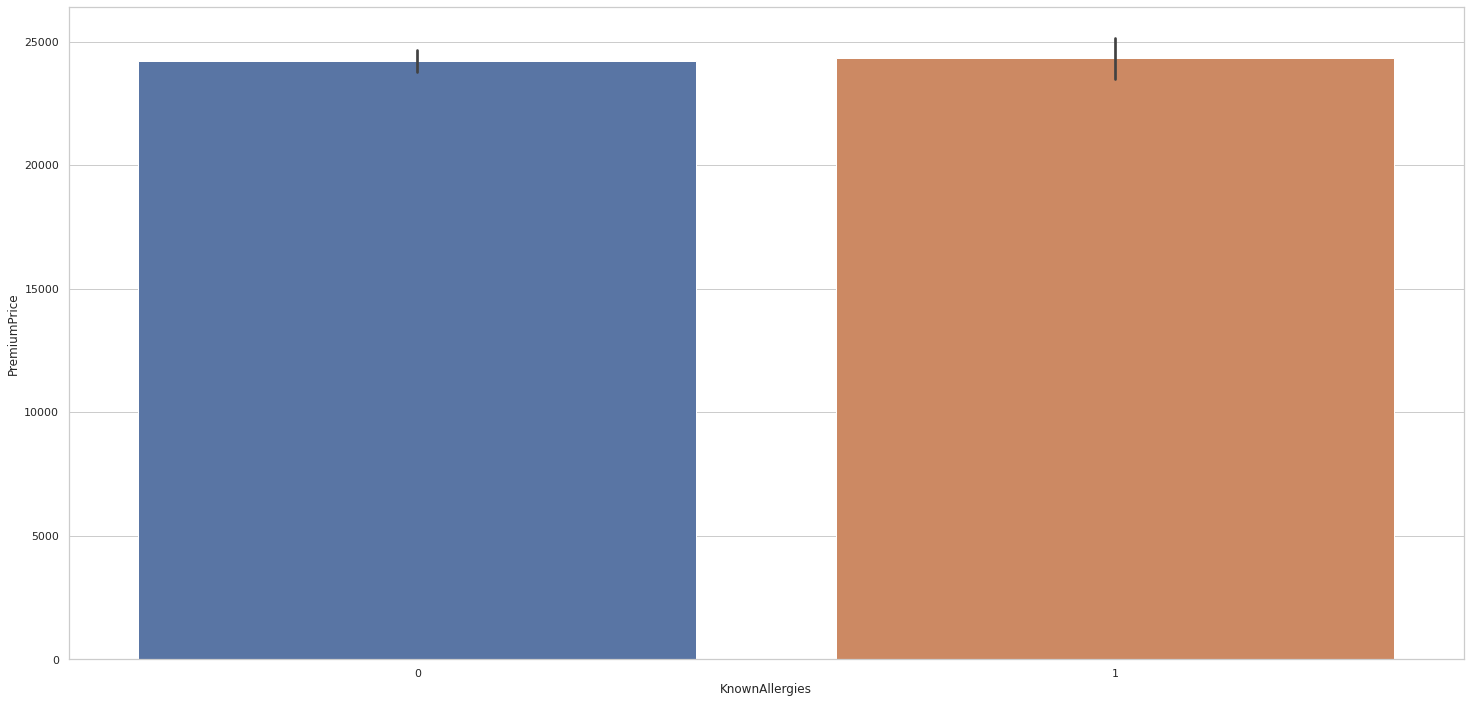

In [ ]:
sns.barplot(x="KnownAllergies", y="PremiumPrice", data=PPDF)
plt.show()

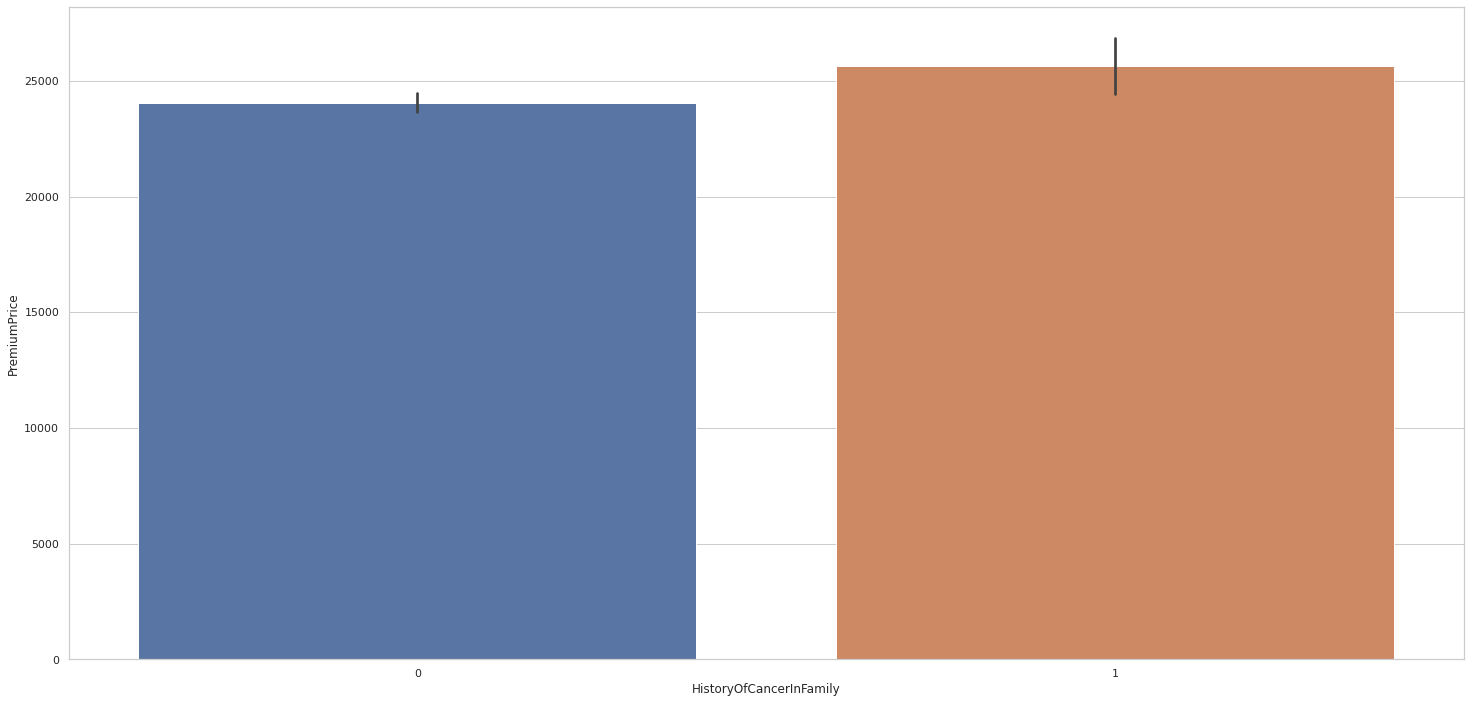

In [ ]:
sns.barplot(x="HistoryOfCancerInFamily", y="PremiumPrice", data=PPDF)
plt.show()

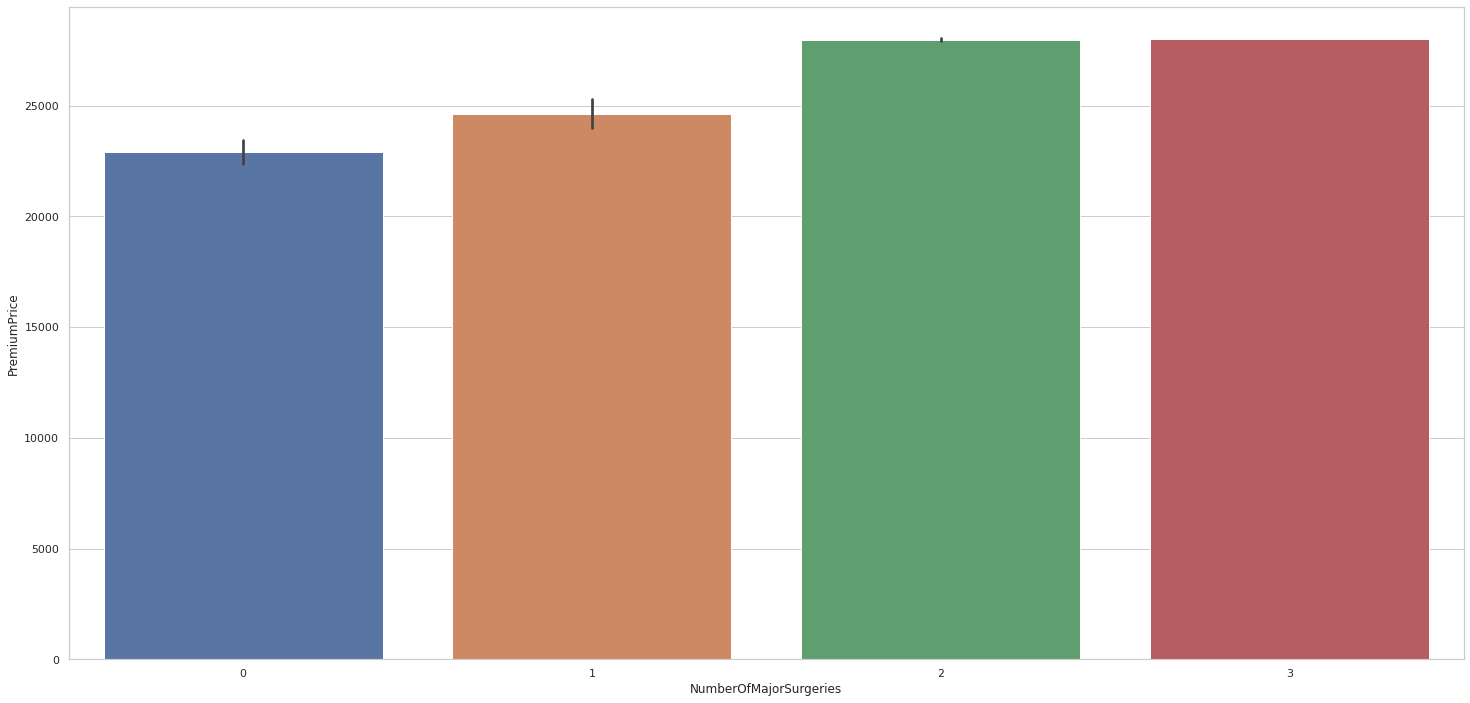

In [ ]:
sns.barplot(x="NumberOfMajorSurgeries", y="PremiumPrice", data=PPDF)
plt.show()

### **LOG TRANSFORMATION**

Creating a copy of original dataset

In [ ]:
PPDFC=PPDF.copy()

In [ ]:
def normality(data,feature):
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    sns.kdeplot(data[feature])
    plt.subplot(1,2,2)
    stats.probplot(data[feature],plot=pylab)
    plt.show()

In [ ]:
#performing logarithmic transformation on the feature
PPDFC['PremiumPrice_log']=np.log(PPDFC['PremiumPrice'])

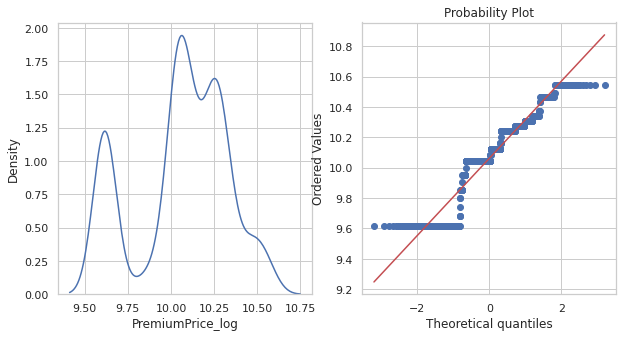

In [ ]:
#plotting to check the transformation
normality(PPDFC,'PremiumPrice_log')

### **Square Root Transformation** This transformation will take the square root of the Price column i.e sqrt(Price).

Creating a copy of original dataset

In [ ]:
PPDF2=PPDF.copy()

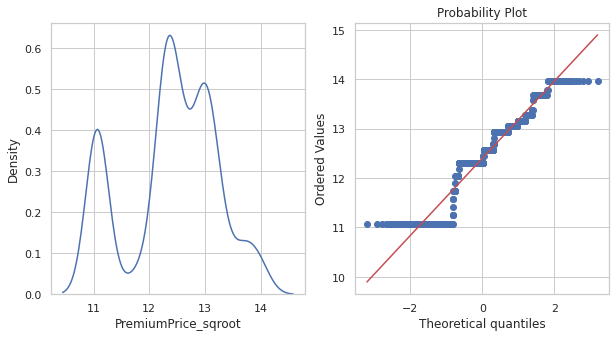

In [ ]:
PPDF2['PremiumPrice_sqroot']=np.sqrt(PPDF2.PremiumPrice)
normality(PPDF2,'PremiumPrice_sqroot')


### **Creating a copy of original dataset**

In [ ]:
PPDFR=PPDF.copy()

### **Reciprocal Transformation – This will inverse values of Price i.e1/Price**

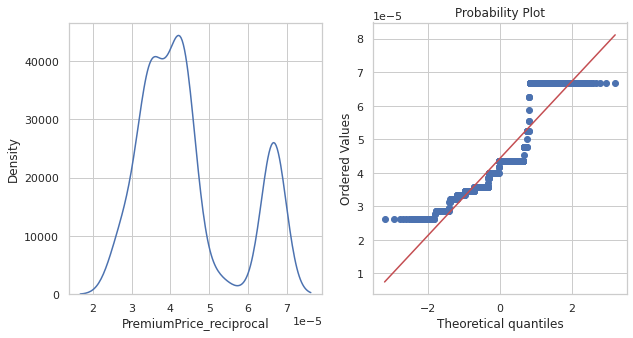

In [ ]:
PPDFR['PremiumPrice_reciprocal']=1/PPDFR.PremiumPrice
normality(PPDFR,'PremiumPrice_reciprocal')

### **Creating a copy of original dataset**

In [ ]:
PPDFE=PPDF.copy()

### **Exponential Transformation: The exponential value of the Price variable will be taken.**

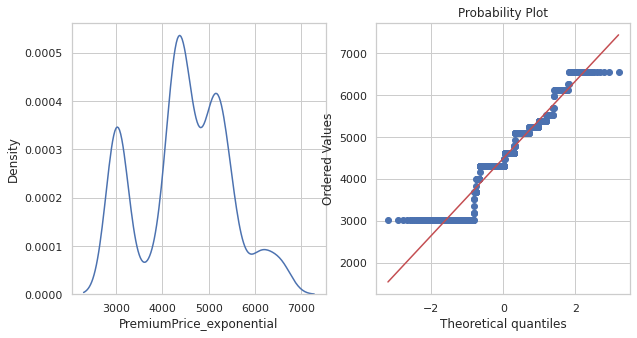

In [ ]:
PPDFE['PremiumPrice_exponential']=PPDFE.PremiumPrice**(1/1.2)
normality(PPDFE,'PremiumPrice_exponential')

### **Creating a copy of original dataset**

In [ ]:
PPDFB=PPDF.copy()

### **Box-Cox Transformation – The Box-Cox transformation is defined as:**


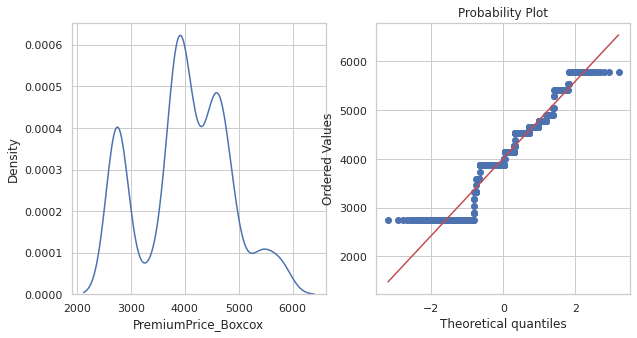

In [ ]:
PPDFB['PremiumPrice_Boxcox'],parameters=stats.boxcox(PPDFB['PremiumPrice'])
normality(PPDFB,'PremiumPrice_Boxcox')

From all the transformations discussed above, we can conclude that the Box cox and Exponential transformation are closer to normal distribution. Any one of the two can be used but as Box cox is more logic-based and involves the λ variable which is chosen as per the best skewness for the data so Box cox will be a better transformation to go with.

In [ ]:
  PPDFB.head()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice,PremiumPrice_Boxcox
0,45,0,0,0,0,155,57,0,0,0,25000,4130.721390
1,60,1,0,0,0,180,73,0,0,0,29000,4651.810094
2,36,1,1,0,0,158,59,0,0,1,23000,3864.013993
3,52,1,1,0,1,183,93,0,0,2,28000,4522.964112
4,38,0,0,0,1,166,88,0,0,1,23000,3864.013993


### **BOXCOX TRANSFORMATION OF INDEPENDANT VARIABLES - AGE, HEIGHT AND WEIGHT**

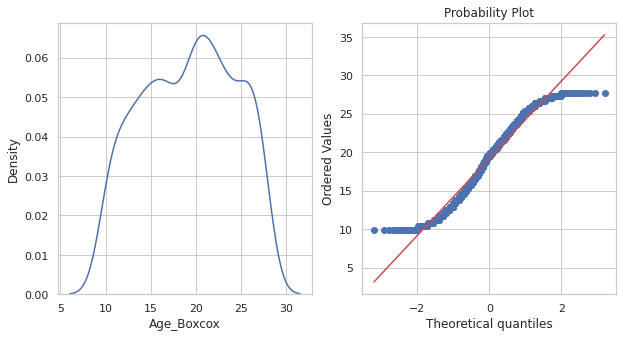

In [ ]:
PPDFB['Age_Boxcox'],parameters=stats.boxcox(PPDFB['Age'])
normality(PPDFB,'Age_Boxcox')

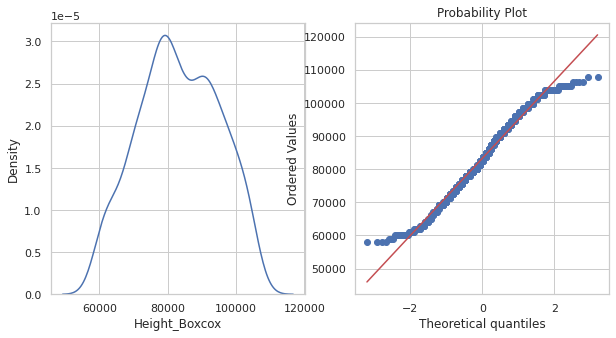

In [ ]:
PPDFB['Height_Boxcox'],parameters=stats.boxcox(PPDFB['Height'])
normality(PPDFB,'Height_Boxcox')

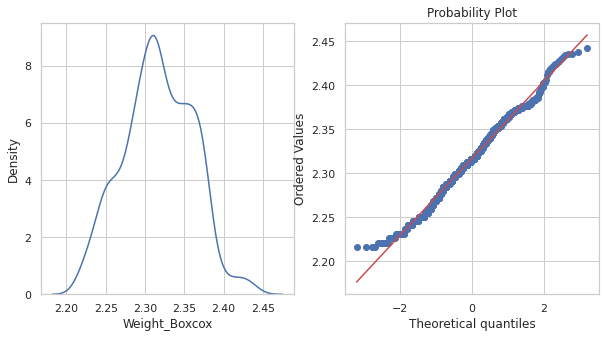

In [ ]:
PPDFB['Weight_Boxcox'],parameters=stats.boxcox(PPDFB['Weight'])
normality(PPDFB,'Weight_Boxcox')